### A very simple linear regression model, showing how to use datasets: BLI vs GDP.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
bli_df = pd.read_csv('data/oecd_bli_2015.csv', thousands=',')
gdp_df = pd.read_csv('data/gdp_per_capita.csv',thousands=',',encoding='latin1',na_values='n/a')

#### Data Preprocessing

In [3]:
bli = bli_df[bli_df["INEQUALITY"]=="TOT"]
bli = bli.pivot(index="Country", columns="Indicator", values="Value")

In [4]:
gdp_df.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_df.set_index('Country',inplace=True)
gdp = gdp_df[['GDP per capita']]

In [5]:
stats = pd.merge(left=bli, right=gdp,left_index=True, right_index=True)
stats.sort_values(by="GDP per capita", inplace=True)

In [6]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
stats1 = stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [9]:
stats2 = stats

#### Data Visualization

In [12]:
X = np.c_[stats1["GDP per capita"]]
y = np.c_[stats1["Life satisfaction"]]

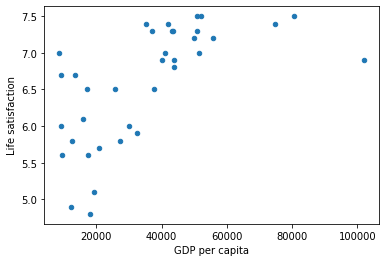

In [14]:
stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

#### Model Fitting

In [15]:
model = LinearRegression()
model.fit(X,y)
X_new = [[22587]]
print(model.predict(X_new))
print(model.score(X,y),model.coef_,model.intercept_)

[[5.96242338]]
0.734441435543703 [[4.91154459e-05]] [4.8530528]


In [16]:
model2 = KNeighborsRegressor()
model2.fit(X,y)
X_new = [[22587]]
print(model2.predict(X_new))
print(model2.score(X,y))

[[5.58]]
0.8023975402676358
